In [35]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

from helperfun import plot_decision_boundary

In [25]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.15, random_state=64)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

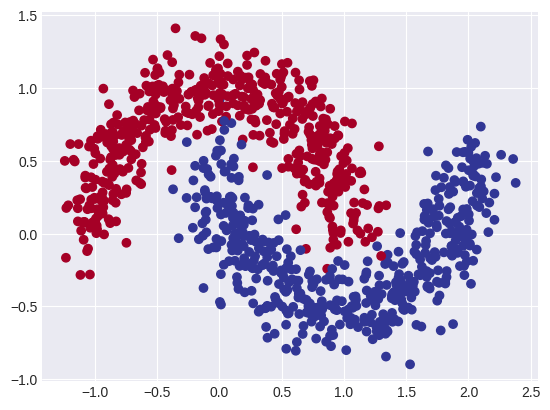

In [26]:
plt.style.use("seaborn-v0_8-darkgrid")
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [81]:
class MoonsModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_features=2, out_features=16),
            nn.Softplus(),
            nn.Linear(in_features=16, out_features=16),
            nn.LeakyReLU(),
            nn.Linear(in_features=16, out_features=1)
        )
    
    def forward(self, X):
        return self.network.forward(X)

model = MoonsModelV0()

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=1.5)

In [87]:
epochs = 10000

for epoch in range(epochs):
    model.train()
    y_logits = model.forward(X_train).squeeze()
    loss = loss_fn(y_logits, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 0.029044948518276215
Epoch: 100 | Loss: 0.029040422290563583
Epoch: 200 | Loss: 0.02903592400252819
Epoch: 300 | Loss: 0.02903146483004093
Epoch: 400 | Loss: 0.02902703359723091
Epoch: 500 | Loss: 0.029022688046097755
Epoch: 600 | Loss: 0.029018299654126167
Epoch: 700 | Loss: 0.029013965278863907
Epoch: 800 | Loss: 0.029009658843278885
Epoch: 900 | Loss: 0.0290053840726614
Epoch: 1000 | Loss: 0.029001157730817795
Epoch: 1100 | Loss: 0.028996935114264488
Epoch: 1200 | Loss: 0.028992734849452972
Epoch: 1300 | Loss: 0.028988562524318695
Epoch: 1400 | Loss: 0.028984442353248596
Epoch: 1500 | Loss: 0.028980355709791183
Epoch: 1600 | Loss: 0.02897627279162407
Epoch: 1700 | Loss: 0.028972236439585686
Epoch: 1800 | Loss: 0.02896820940077305
Epoch: 1900 | Loss: 0.02896420657634735
Epoch: 2000 | Loss: 0.0289602130651474
Epoch: 2100 | Loss: 0.02895626798272133
Epoch: 2200 | Loss: 0.028952360153198242
Epoch: 2300 | Loss: 0.028948470950126648
Epoch: 2400 | Loss: 0.02894457802176475

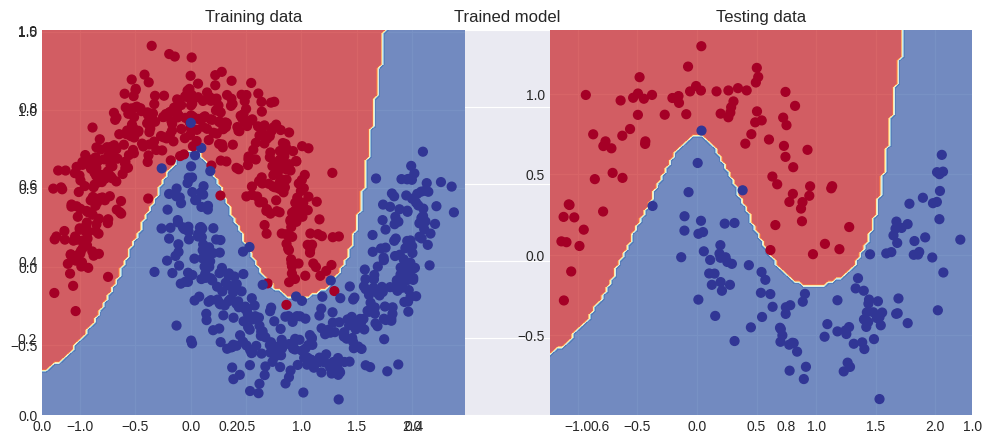

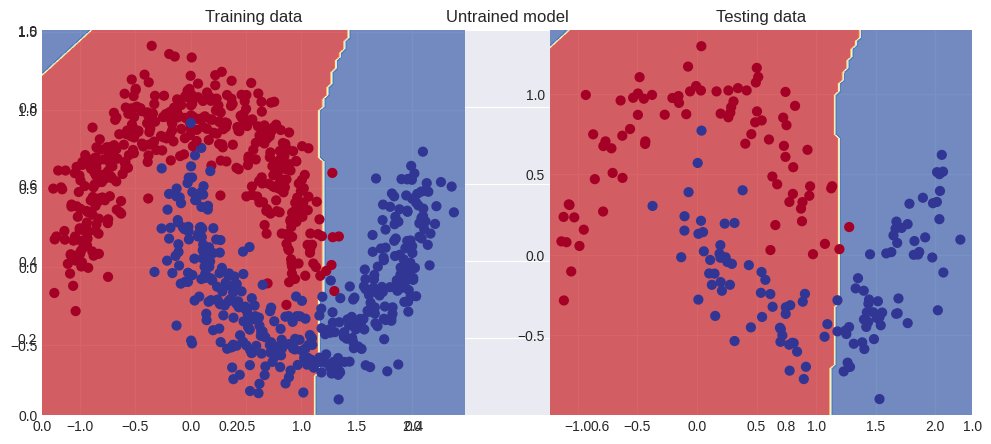

In [88]:
torch.manual_seed(32)
untrained_model = MoonsModelV0()

plt.figure(figsize=(12, 5))
plt.title("Trained model")
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model, X_test, y_test)
plt.show()

plt.figure(figsize=(12, 5))
plt.title("Untrained model")
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(untrained_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(untrained_model, X_test, y_test)
plt.show()

In [97]:
from torchmetrics.classification import BinaryAccuracy

metric = BinaryAccuracy()

y_logits = model.forward(X_test).squeeze()
y_pred = torch.round(torch.sigmoid(y_logits))
accuracy_test = metric(y_pred, y_test)

y_logits = model.forward(X_train).squeeze()
y_pred = torch.round(torch.sigmoid(y_logits))
accuracy_train = metric(y_pred, y_train)

print(
    f"Training accuracy: {accuracy_train*100:.2f}%",
    f"Testing accuracy: {accuracy_test*100:.2f}%",
    sep="\n"
)

Training accuracy: 98.62%
Testing accuracy: 99.00%
